## brent_ml.ipynb
### Author: Brent Ramirez
https://github.com/bramz00/datafun-07-ml

In [ ]:
import numpy
import pandas
import pyarrow
import matplotlib
import seaborn
import scipy

## Part 1 - Chart a Straight Line

In [ ]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

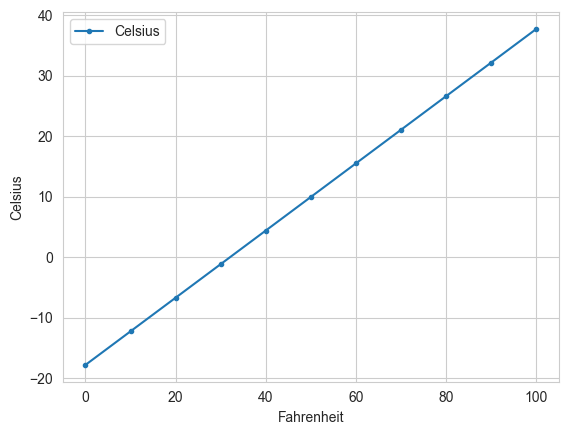

In [ ]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Avg High Temp in NYC in January

In [ ]:
from scipy import stats
import seaborn as sns

### Section 1 - Data Acquisition

In [ ]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [ ]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [ ]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [ ]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [ ]:
nyc.Date.dtype

dtype('int64')

In [ ]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [ ]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model 

In [ ]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [ ]:
linear_regression.slope

np.float64(0.014771361132966163)

In [ ]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [ ]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [ ]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

(10.0, 70.0)

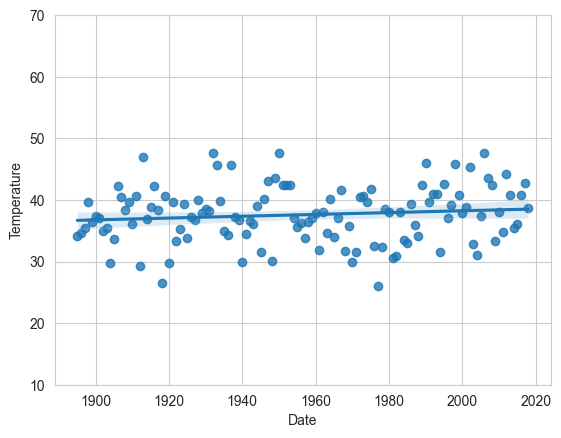

In [ ]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

In [ ]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [ ]:
X_train.shape

(93, 1)

In [ ]:
X_test.shape

(31, 1)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
linear_regression.coef_

array([0.01939167])

In [ ]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [ ]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

In [ ]:
predict(1890)

array([36.34246432])

### Section 4 - Visualizations

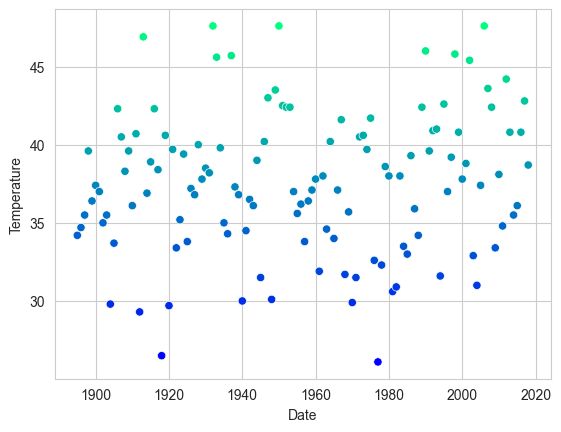

In [ ]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [ ]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [ ]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [ ]:
y = predict(x)

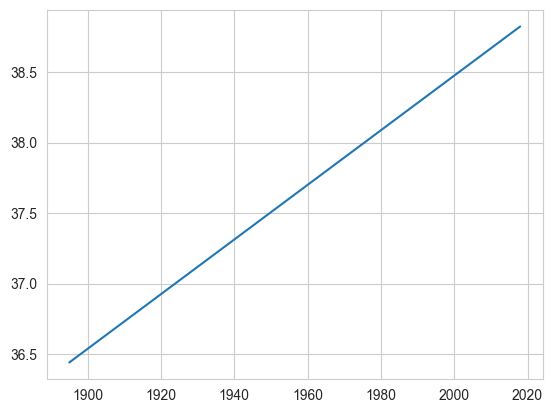

In [ ]:
line = plt.plot(x, y)

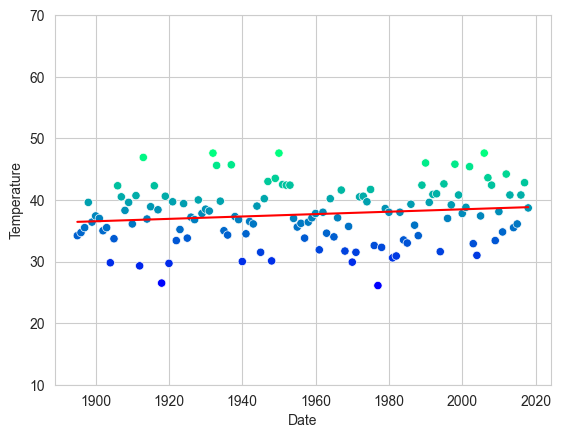

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False, ax=ax)

ax.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

ax.plot(x, y, color='red') 

plt.show()


## Part 4 - Adding Insights

Comparing the two methods reveals both strengths and trade-offs. The first method is more intuitive and easier to interpret, making it well-suited for initial exploration or when communicating results to a non-technical audience. The second method, despite being more complex, demonstrates better generalization, especially when working with more nuanced or less linear data. This leads us to an important consideration in machine learning: the balance between model simplicity and predictive performance. Ultimately, the best method depends on the context, including the nature of the data and the goals of the analysis.